## Assignment 3 (Activity Recognition from Single Chest-Mounted Accelerometer)

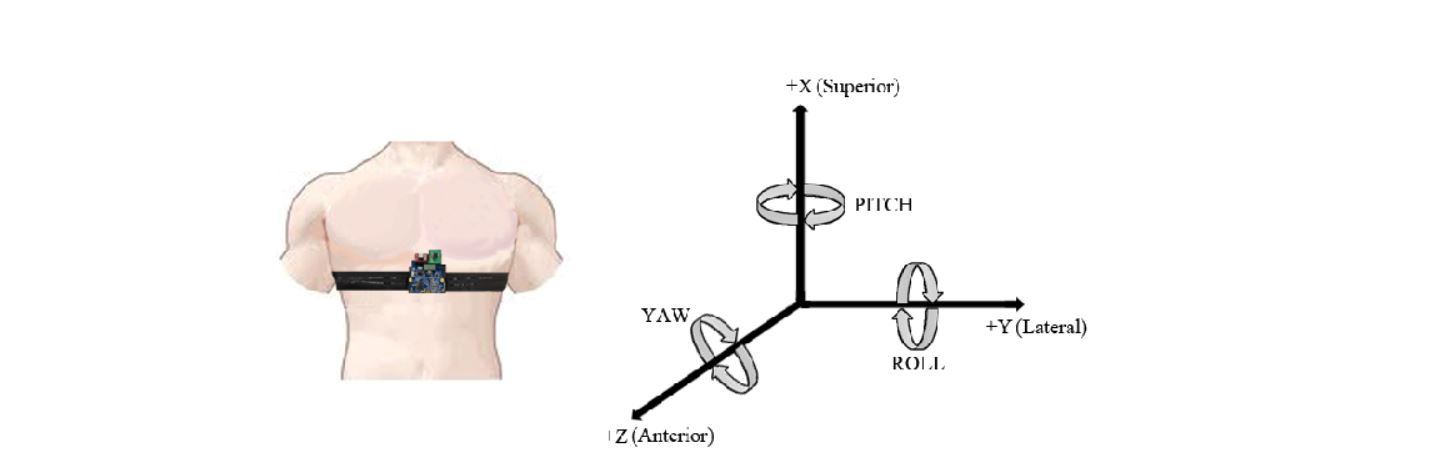

In [264]:
from IPython.display import Image
Image("images.JPG")

The Activity Recognition from Single Chest-Mounted Accelerometer dataset mainly comprises of uncalibrated accelerometer data mounted on 15 respondents(users). The experiment basically analyses 7 activities performed by each respondent. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer. The activities in the dataset are codified by numbers and following are the information of the numbers assigned to each of the activity:

1. Working at computer is codified as 1
2. Standing up, Walking and going updown stairs is codified as 2
3. Standing is codified as 3
4. Walking is codified as 4
5. Going upDown stairs is codified as 5
6. Walking and talking with someone is codified as 6
7. Talking While Standing is codified as 7


# Task 1 (Data Preparation)


In order to perform data preparation we will first read all the 15 files at once. Moreover, while appending each file we will add one columne, representing the respondent no (to which respondent/user this file belongs). Also, this dataset do not have any missing values.

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
filepath = r"C:\Users\adity\Desktop\RMIT\Python (Practical Data Science With Python)\Assignments\Assignment 3\one\Activity Recognition from Single Chest-Mounted Accelerometer\Activity Recognition from Single Chest-Mounted Accelerometer"
filesDir = glob(filepath + "/*.csv")
final_acc = pd.DataFrame()

In [2]:
#Reading all the files at once
pID = 0
for pID, filename in enumerate(filesDir):
    acc = pd.read_csv(filename, index_col=None, header=None)
    acc['User ID'] = pID + 1 
    final_acc = final_acc.append(acc)

# Keeping only the required varaibles
del final_acc[0]
final_acc.columns = ['X-acceleration', 'Y-acceleration', 'Z-acceleration', 'Activity ID', 'User ID']

In [3]:
#Basic information about the dataset
print("Dataset Info: ")
print(final_acc.info())
print("Dataset Description: ")
print(final_acc.iloc[:, 0:3].describe())

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926896 entries, 0 to 166740
Data columns (total 5 columns):
X-acceleration    int64
Y-acceleration    int64
Z-acceleration    int64
Activity ID       int64
User ID           int64
dtypes: int64(5)
memory usage: 88.2 MB
None
Dataset Description: 
       X-acceleration  Y-acceleration  Z-acceleration
count    1.926896e+06    1.926896e+06    1.926896e+06
mean     1.987652e+03    2.382523e+03    1.970596e+03
std      1.113578e+02    1.003151e+02    9.445893e+01
min      2.820000e+02    2.000000e+00    1.000000e+00
25%      1.904000e+03    2.337000e+03    1.918000e+03
50%      1.992000e+03    2.367000e+03    1.988000e+03
75%      2.076000e+03    2.413000e+03    2.032000e+03
max      3.828000e+03    4.095000e+03    4.095000e+03


In [4]:
#Number of activities performed by each user 
activityPerUser = final_acc['Activity ID'].value_counts()
print("Activity Per User :")
print(activityPerUser)
totalCountOfActivity = activityPerUser.sum()
print(totalCountOfActivity)

Activity Per User :
1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
0      3719
Name: Activity ID, dtype: int64
1926896


## Task 2 (Data Exploration):
The data exploration will help us in understanding the dataset. We have performed 10 explorations for different columns and each exploration tells us a new thing about the data. 

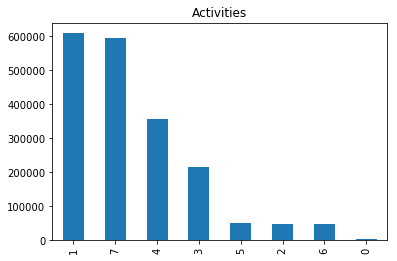

In [5]:
person = final_acc.iloc[:, -2].value_counts()
person.plot(kind = 'bar', title = "Activities");

#### Note:
From the above bar graph it is evedent that Activity numbers 1, 7 and 4 i.e. working at computers, Talking while standing and walking are the most frequently done activities. Moreover,  Activity 1 (Working at computers) is the most done activity which indicates that all the respondents have a job which requires to work on computers. Furthermore, other frequently done activities like 7 and 4 indicate that our respondents care about their fitness. 

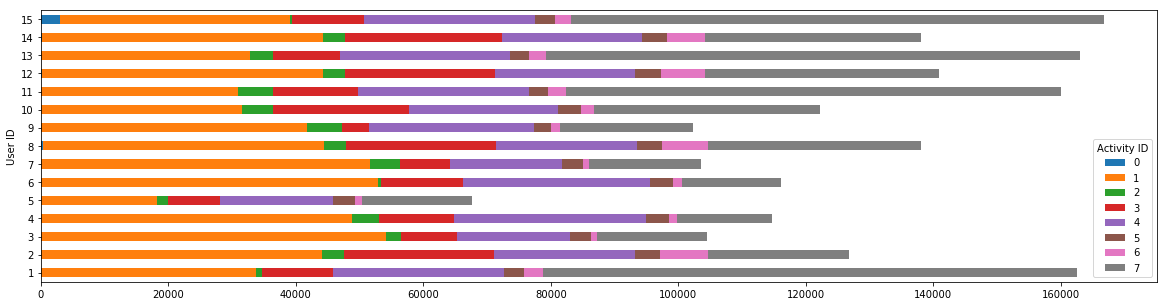

In [6]:
test = pd.crosstab(index=final_acc.iloc[:, -1], columns=final_acc.iloc[:, -2])
test.plot(kind = "barh", stacked = True, figsize = (20, 5));

#### Observations:
From the above bar chart we can clearly make out the amount of work each respondent does. From the chart, respondent 3 does most ofthe work on computers; whereas respondent number 5 does the least. Also respondent number 2, 8, 12 and 14 perform activity number 6. Therefore, we can assume these respondents as fitness freaks. Furthermore, respondent number 5 spends a very less time in all the activities, hence we can assume that respondent number 5 is not that active as compared to the other respondents or may be the respondent is aged (old) when comparerd to other respondents.

#### Activities:
The Following explorations give information about the x, y and z accelerations trends with respect to the activities. For all the 7 activities we have plotted a subplot; giving information about the accelerations per activity.

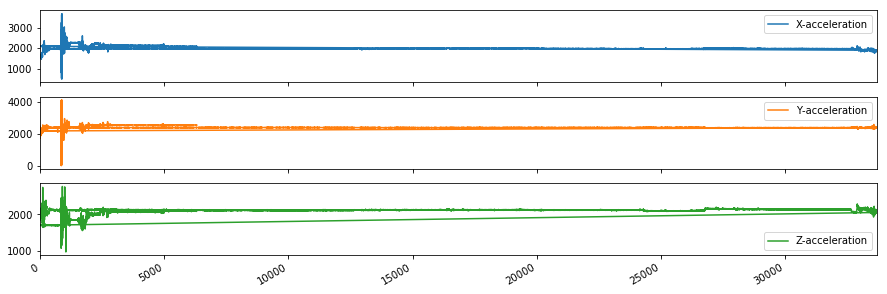

In [52]:
# Working at Computers 
expOne = final_acc[final_acc['Activity ID'] == 1]
expOne = expOne[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expOne = expOne[:40000]
axOne = expOne.plot(subplots = True, figsize = (15, 5))

#### Observations:
From the above exploration, we can clearly see some large movements at the beginning. This unusal behaviour may be because of the presence of the outliers, The reason for such unusual behaviour could be the instability of the accelerometer which placing it or switching on. Also working with computers requires no sort of major movemet, which can be clearly seen ahead in the plot.

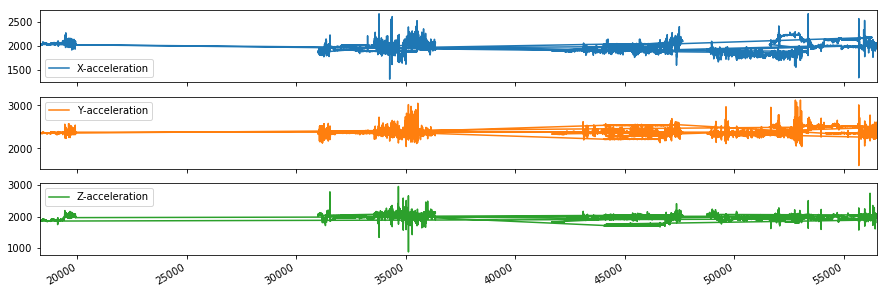

In [51]:
# Standing Up, Walking and going up down stairs 
expTwo = final_acc[final_acc['Activity ID'] == 2]
expTwo = expTwo[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expTwo = expTwo[:40000]
axTwo = expTwo.plot(subplots = True, figsize = (15, 5))

#### Observations:
From the above exploration we can see no movement in the begning which clearly indicates that the respondents are standing up at that particular moment. Furthermore spikes at some point in the plot indicate some kind of movement i.e. at that moment it is possible that the respondent is doing some tasks which require some kind of a movement (walking, going up or down the stairs).

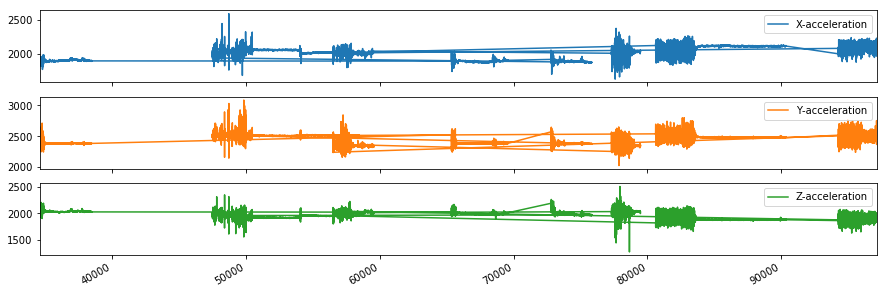

In [55]:
#Standing
expThree = final_acc[final_acc['Activity ID'] == 3]
expThree = expThree[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expThree = expThree[:40000]
axThree = expThree.plot(subplots = True, figsize=(15, 5))

#### Observations:
From the above graph we can clearly see some movement, these movements are considerable because a person can not stand still all the time. Moreover, in the begning, we can spot some unusual behaviour. These unusual patterns can be caused because of the presence of the outliers in the dataset. These outliers can be removed to make the dataset look more uniform and normal.

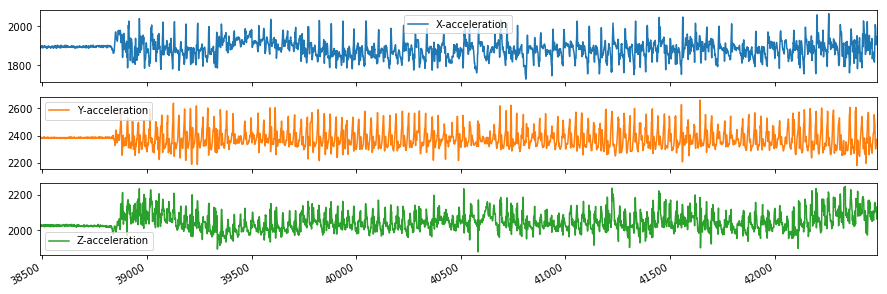

In [53]:
# Walking
expFour = final_acc[final_acc['Activity ID'] == 4]
expFour = expFour[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFour = expFour[:4000]
axFour  = expFour.plot(subplots = True, figsize=(15, 5))

#### Observations:
From the above plot we can see a constant movement in the plot, which is normal because walking requires constant movement of the body. Also, further the speed of the respondent can be observed i.e. when the respondent walks fast the x, y and z coordinates will show some rapid changes. Hence, other than activity speed of the respondent can also be determined using this data.

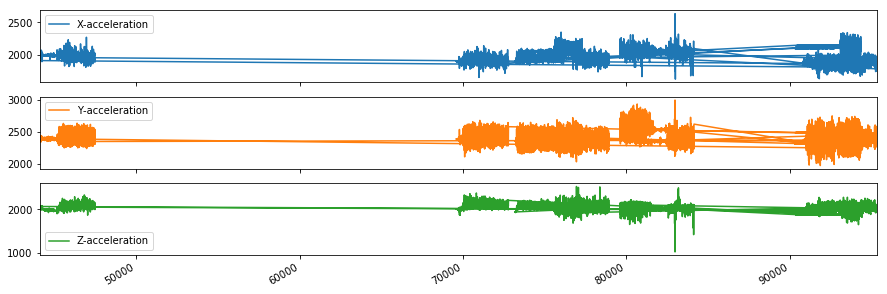

In [60]:
# Going UP Down Stairs
expFive = final_acc[final_acc['Activity ID'] == 5]
expFive = expFive[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expFive = expFive[:40000]
axFive  = expFive.plot(subplots = True, figsize=(15, 5))

#### Observations:
From the above plot we can clearly figure out some kind of a movement or work done i.e. Going up Down Stairs. Somewhere in the middle we can observe a constant movement, this constant movement may be caused while going down the stairs as going down the stairs do not require much of work; whereas some rapid fluctuation can also be seen, these rapid fluctuation can be caused while going up the stairs as going up requires more.   

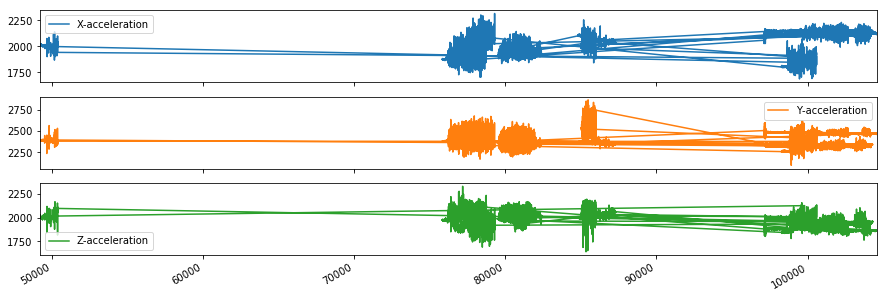

In [63]:
# Walking and talking with someone
expSix = final_acc[final_acc['Activity ID'] == 6]
expSix = expSix[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSix = expSix[:40000]
axSix  = expSix.plot(subplots = True, figsize=(15, 5))

#### Note:
from the above plot we can clearly see some smooth linear line and some spikes. These smooth linear lines indicate that respondent is talking or is a conversation with some one; and the spikes indicates some sort of a movement i.e. walking or talking on phone while walking. Also, in the middle the speed of the respondents can also be observed i.e. an instant fluctuation in the graph indicates that the respondents have increased their speed while walking. The contribution to the fluctuation is not solely because of the speed; talking can also contribute as our body vibrates while talking. Therefore, assuming that walking only causes the fluctuation will be a wrong assumption.    

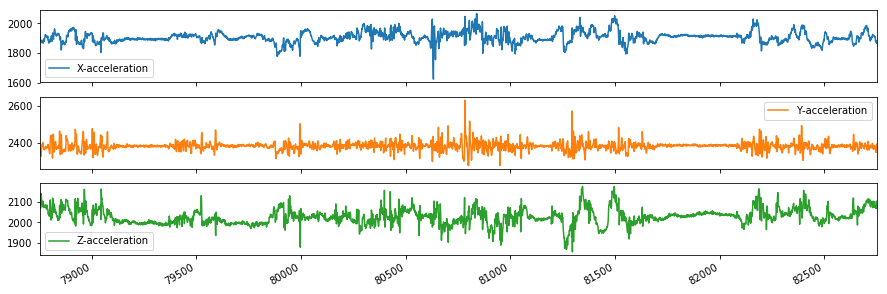

In [65]:
#Talking while standing
expSeven = final_acc[final_acc['Activity ID'] == 7]
expSeven = expSeven[['X-acceleration', 'Y-acceleration', 'Z-acceleration']]
expSeven = expSeven[:4000]
axSeven  = expSeven.plot(subplots = True, figsize = (15, 5))

#### Note:
from the above graph we can see some movement which is very obvious because standing still is not possible all the time. Also, while talking our body produces some vibrations, these vibrations can also have a contribution in the movement of the accelerometer.

## Task 3 (Data Modelling)
#### Splitting the data into train and test set
To split the dataset into training and test set we need to select the features based on which our model is going to predict the labeled values(target variables). These features are also called independent varaibles and the target variables are termed as dependent variabels. Mostly, we keep 70% of the data in the training phase and rest 30% in the test phase. The more the model gets the data to train, the better prediction will be done.

In [7]:
from sklearn.model_selection import train_test_split #importing train_test_split library from sklearn
x = final_acc.iloc[:, 0:3] #Features (Independent Variables)
y = final_acc.iloc[:, -2] #Target Variables (Dependent Variables)
#Splitting the data into train and test, keeping 70% in train and rest 30% in test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30) 
print("X Train:\n", x_train.head(3), "\n")
print("Y Train:\n", y_train.head(3), "\n")
print("X Test (Unseen Data):\n", x_test.head(3), "\n")
print("Y Test (Unseen Data):\n", y_test.head(3), "\n")


X Train:
        X-acceleration  Y-acceleration  Z-acceleration
55430            2123            2343            1965
9889             2024            2353            1864
31777            1970            2391            2014 

Y Train:
 55430    3
9889     1
31777    2
Name: Activity ID, dtype: int64 

X Test (Unseen Data):
         X-acceleration  Y-acceleration  Z-acceleration
105480            2029            2391            1909
12196             2174            2228            1733
84659             2111            2550            2041 

Y Test (Unseen Data):
 105480    7
12196     1
84659     7
Name: Activity ID, dtype: int64 



### Modelling:

#### Decision Tree Classifier
A decision tree is a representation used for classification, where the dataset is split based on different conditions. For this dataset, we choose to use this type of classification, where we split the data based on some parameter. Also, we intend tune the parameters so that we can use those parameter and get a good accuracy score for the choosen dataset. Furthermore, Kfold cross validation and stratified shuffel split cross validation are used

##### Feature Selection using Hill Climbing :

In [8]:
from sklearn.utils import shuffle 
from sklearn.tree import DecisionTreeClassifier as dtc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_acc.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = dtc(criterion = 'gini', max_depth = 15)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.4744673756647668
Score with 2 selected features: 0.6430012494177817
Score with 3 selected features: 0.7381165837829983


#### Note:
From the hill climbing technique it is clearly seen that choosing 3 features it will give us a better result. Therefore we will use all the 3 given features(i.e. X-Acceleration, Y-Acceleration and Z-Acceleration) for the Decision Tree Classifier

#### Selecting the parameters for the Decision Tree Classifier (Tuning the parameters manually)


 Criterion : Gini

Accuracy for criterion GINI and Max_depth = 2  is  43.94890575346542 %
Accuracy for criterion GINI and Max_depth = 3  is  48.65664825479311 %
Accuracy for criterion GINI and Max_depth = 4  is  52.29012453530634 %
Accuracy for criterion GINI and Max_depth = 5  is  59.08585307290306 %
Accuracy for criterion GINI and Max_depth = 6  is  61.95281186155977 %
Accuracy for criterion GINI and Max_depth = 7  is  64.73535166217181 %
Accuracy for criterion GINI and Max_depth = 8  is  66.67975622287304 %
Accuracy for criterion GINI and Max_depth = 9  is  68.91218868335787 %
Accuracy for criterion GINI and Max_depth = 10  is  70.77494209168802 %
Accuracy for criterion GINI and Max_depth = 11  is  71.83121738062411 %
Accuracy for criterion GINI and Max_depth = 12  is  72.54877877900388 %
Accuracy for criterion GINI and Max_depth = 13  is  73.39850433079788 %
Accuracy for criterion GINI and Max_depth = 14  is  73.84810463802765 %
Accuracy for criterion GINI and Max_depth = 15  is  

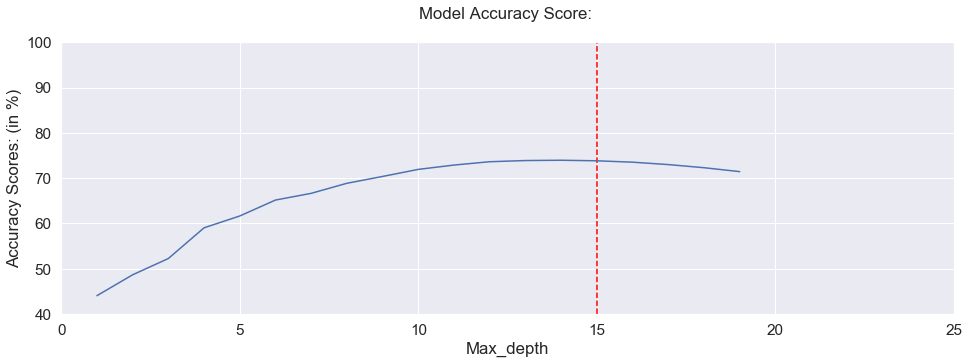

In [233]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
accur2 = []
val = 0
val2 = 0
print("\n Criterion : Gini\n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'gini', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val:
        val = a
        ind = k
    accur.append(a)
    print("Accuracy for criterion GINI and Max_depth =", k, " is ", a, "%")

print("\nCriterion : Entropy \n")
for i in range(1, 20):
    k = i+1
    decisionTreeClassifier = dtc(criterion = 'entropy', max_depth = k)
    decisionTreeClassifier.fit(x_train, y_train)
    y_predict = decisionTreeClassifier.predict(x_test)
    a = acc(y_test, y_predict)*100
    if a > val2:
        val2 = a
        ind = k
    accur2.append(a)
    print("Accuracy for criterion ENTROPY and Max_depth =", k, " is ", a, "%")
    
print("\n")
if max(accur) > max(accur2):
    print("Criterion selected as GINI and max depth", ind, "will give us an accuracy score of ", max(accur))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');
else:
    print("Criterion selected as ENTROPY and max depth", ind, "will give us an accuracy score of ", max(accur2))
    plt.figure(figsize=(16,5))
    plt.title("Model Accuracy Score: \n")
    plt.ylabel("Accuracy Scores: (in %)")
    plt.ylim(40, 100)
    plt.xlim(0, 25)
    plt.xlabel("Max_depth")
    plt.plot(range(1, 20), accur2)
    plt.vlines(ind, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors = 'red');

#### Note:
We can also do this by using a gridsearch cv but this technique takes a lot of time to execute. Although, it has been done for the reference. it took 3 hours to execute. The code has been commented out if you want to run the code and see the results then just uncomment it.

In [ ]:
# from sklearn.model_selection import GridSearchCV as gs
# import numpy as np
# conditions = {'criterion' : ('gini', 'entropy'), 'max_depth' : np.arange(1, 25, 2)}
# decision_t = gs(decision_model, conditions, cv= 25)
# decision_t.fit(x_train, y_train)
# decision_t.best_params_ 

# print(dt.score(x_test, y_test))

#### Decision Tree Classifier using the best parameters (Calculated Above)   

In [9]:
from sklearn.tree import DecisionTreeClassifier as dtc #importing Decision tree classifier from sklearn
from sklearn.metrics import classification_report as cr # classification report
from sklearn import metrics #importing metrics library to calculate the accuracy of the classifier model 
from sklearn.metrics import confusion_matrix

decision_tree = dtc(criterion = 'gini', max_depth = 15) #Normal decision tree will "Default Parameters"
decision_tree.fit(x_train, y_train) #fitting the x train and y train set into the decision tree model 
y_predicted = decision_tree.predict(x_test)

Accuracy Score for Normal Decision Tree Classifier:  73.91781949905634
Classification Report for Normal Decision Tree :
                                       precision    recall  f1-score   support

                                    0      0.090     0.006     0.012      1088
                  Working at computer      0.854     0.905     0.878    182707
Standing up, Walking and going updown      0.468     0.139     0.214     14406
                             Standing      0.591     0.455     0.514     65067
                              Walking      0.637     0.715     0.673    107081
                  Going upDown stairs      0.386     0.113     0.175     15315
                  Walking and talking      0.477     0.184     0.266     14258
               Talking While Standing      0.748     0.839     0.791    178147

                             accuracy                          0.739    578069
                            macro avg      0.531     0.420     0.441    578069
         

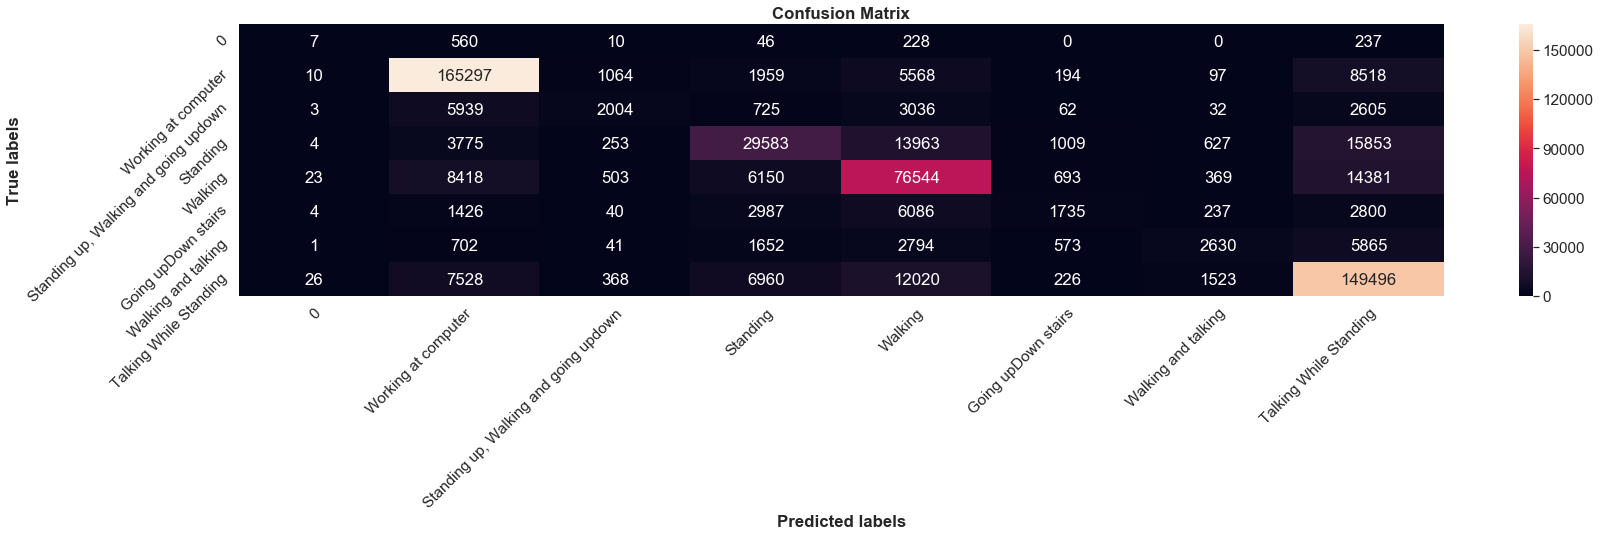

In [159]:
#Accuracy Score for the above trained decision tree classifier with default parameter
print('Accuracy Score for Normal Decision Tree Classifier: ', (metrics.accuracy_score(y_test, y_predicted)*100))
#Printing the classification report for the normal decision tree
print("Classification Report for Normal Decision Tree :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, y_predicted, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("Visualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation= 45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

#### Decision Tree With Kfold Cross Validation:
Kfold cross validation, the data is divided into folds. Each fold is has specific amount of data to train and test. once the training and testing are performed, we then simultaniously check the accuracy score for each validation dataset.

In [115]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import cross_val_predict as cvp

decision_model = dtc() 
k_fold = kf(n_splits = 25, random_state = 0)
#Decision Tree Model is trained on the entire dataset
accuracyScores = cvs(decision_model, x, y, cv = k_fold) 
#Predicting the target values using the modified decision tree model on the unseen data
pred = cvp(decision_model, x_test, y_test) 

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mean accuracy for the Decision Tree Classifier(Cross Validation Score):  0.3173124042427332
Classification Report for Decision Tree(KFold Cross Validation) :
                                       precision    recall  f1-score   support

                                    0      0.119     0.141     0.129      1088
                  Working at computer      0.834     0.839     0.836    182707
Standing up, Walking and going updown      0.211     0.212     0.212     14406
                             Standing      0.401     0.426     0.413     65067
                              Walking      0.559     0.549     0.554    107081
                  Going upDown stairs      0.148     0.155     0.151     15315
                  Walking and talking      0.207     0.219     0.213     14258
               Talking While Standing      0.724     0.704     0.714    178147

                             accuracy                          0.647    578069
                            macro avg      0.400  

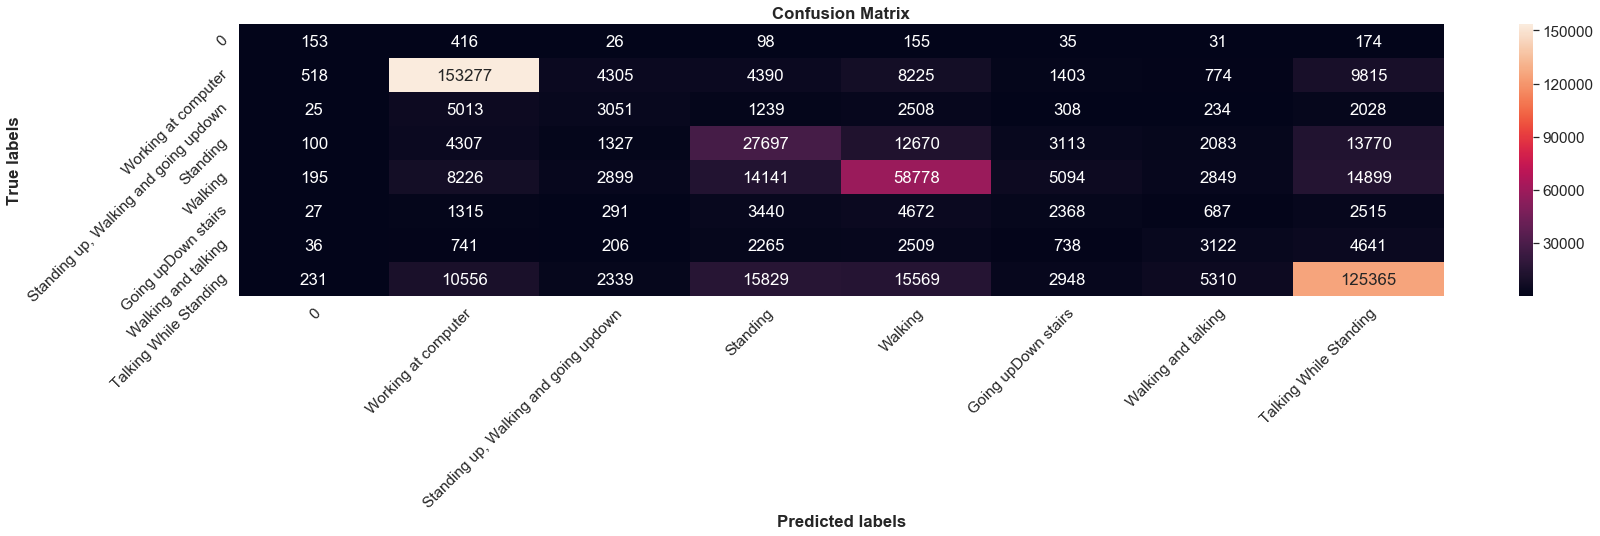

In [144]:
#Accuracy Score for tha above trained decision tree classifier
print("Mean accuracy for the Decision Tree Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for Decision Tree(KFold Cross Validation) :")
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
print(cr(y_test, pred, digits = 3, target_names=target_names))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)


# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

#### Note: 
The reason for such low accuracy result is the uneven distribution of the target variables(Activities). In the dataset the activity numbers 7 and 1 are the most frequently done activities but in the dataset there are many activities which are not done very often. Therefore, in some folds it is possible that such activities donot exist, hence affecting our accuracy result. However, in the normal decision tree we have the same number of target distribution but the number of instances(data) are more which is an obvious reason for the good cross validation score.    

#### 4. Decision Tree With KFold Cross Validation (Shuffle)
This cross validation is a version of KFold itself. The only difference is that in this we shuffle the dataset randomly.the whole data is first shuffled and then split into the K-Folds. Keeping the shuffle equals to true will maintain the homogenity throughout the dataset. Also this will increase the cross validation score of the model.

In [237]:
ShuffK_fold = kf(n_splits = 25, random_state = 0, shuffle = True)
accuracyScores1 = cvs(decision_model, x, y, cv = ShuffK_fold) 
Strat_pred = cvp(dtc(), x_test, y_test)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy Score for Normal Decision Tree Classifier:  0.6574421090871349
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0      0.120     0.141     0.129      1088
           1      0.834     0.839     0.836    182707
           2      0.213     0.215     0.214     14406
           3      0.402     0.427     0.414     65067
           4      0.560     0.550     0.555    107081
           5      0.150     0.157     0.154     15315
           6      0.209     0.219     0.214     14258
           7      0.725     0.704     0.714    178147

    accuracy                          0.647    578069
   macro avg      0.401     0.406     0.404    578069
weighted avg      0.650     0.647     0.649    578069

Confusion Matrix:
 [[   153    422     26     99    155     32     30    171]
 [   531 153358   4281   4420   8225   1375    790   9727]
 [    29   4977   3093   1234   2534    314    220   2005]
 [    93   4256   1386  27788  12654   3

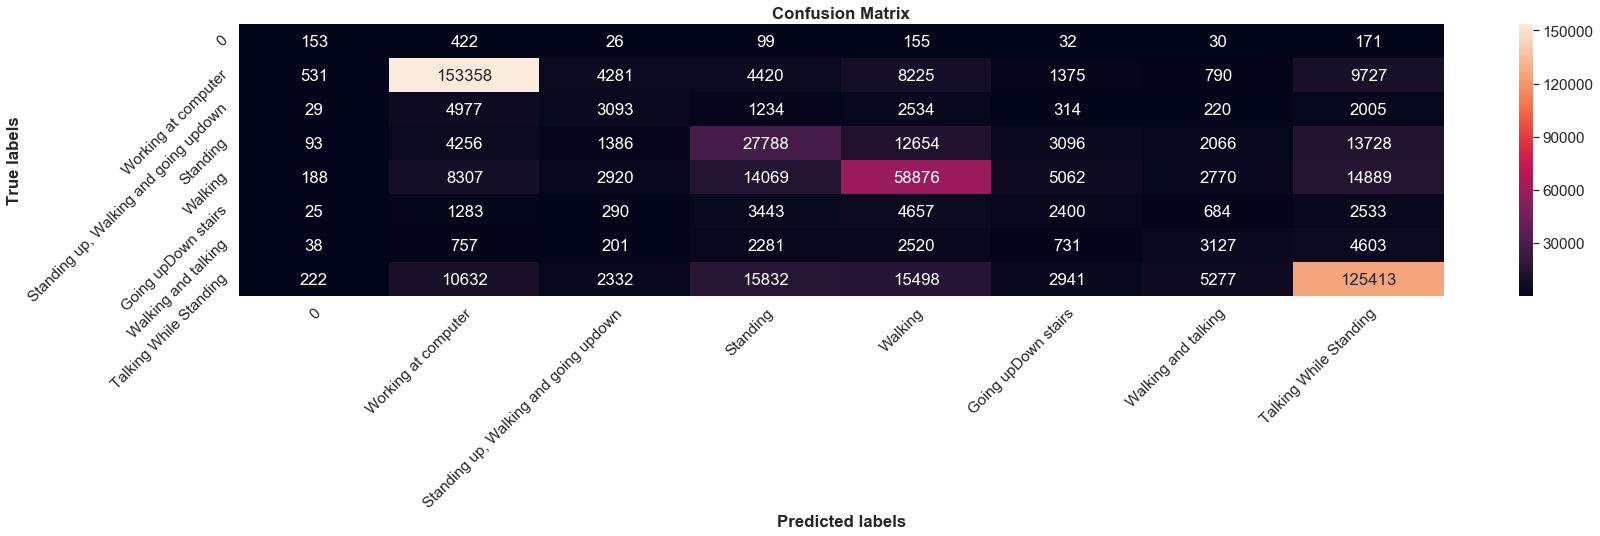

In [252]:
#Accuracy Score for tha above trained decision tree classifier
print("Accuracy Score for Normal Decision Tree Classifier: ", accuracyScores1.mean())
#Printing the classification report
print("Classification Report for Decision Tree:")
print(cr(y_test, Strat_pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, Strat_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

#### KNN (KNearst Neighbor) Classifier:
KNN(KNearst Neighbor) is a non-parametric method used for classification. Such type of classification method are based on feature similarity. With this dataset, we intend to run a normal KNN and check the accuracy for it. Furthermore, we will also do a KFold cross validation.

##### Feature Selection using Hill Climbing :

In [244]:
from sklearn.utils import shuffle 
from sklearn.neighbors import KNeighborsClassifier as knc

new_Index = []
MaxScore = 0.0
columnNum = 3
randomIndex = shuffle(range(0,columnNum), random_state=0)


for i in range(0, columnNum):
    new_Index.append(randomIndex[i])
    newData = final_acc.iloc[:, new_Index]
    X_train, X_test, Y_train, Y_test = train_test_split(newData, y, test_size=0.4, random_state=0)
    classifier = knc(5)
    fit = classifier.fit(X_train, Y_train)
    cur_Score = classifier.score(X_test, Y_test)
    if cur_Score < MaxScore:
        new_Index.remove(randomIndex[i])
    else:
        MaxScore = cur_Score
        print("Score with " + str(len(new_Index)) + " selected features: " + str(cur_Score))


Score with 1 selected features: 0.40178447478394674
Score with 2 selected features: 0.5979287948632452
Score with 3 selected features: 0.7226253601968968


#### Note:
From the hill climbing technique it is clearly seen that choosing 3 features it will give us a better result. Therefore we will use all the 3 given features(i.e. X-Acceleration, Y-Acceleration and Z-Acceleration) for the KNN Classifier.

#### Finding the optimum number of neighbours for the KNN Model

Accuracy is  65.22024187423993 % for k value :  2
Accuracy is  69.9428614923132 % for k value :  3
Accuracy is  71.26536797510332 % for k value :  4
Accuracy is  72.28618036947147 % for k value :  5
Accuracy is  72.85497060039545 % for k value :  6
Accuracy is  73.34176369948916 % for k value :  7
Accuracy is  73.65522108952392 % for k value :  8
Accuracy is  73.92058733472993 % for k value :  9
Accuracy is  74.09098221838569 % for k value :  10
Accuracy is  74.28628762310382 % for k value :  11
Accuracy is  74.40980229003804 % for k value :  12
Accuracy is  74.49975694942991 % for k value :  13
Accuracy is  74.59628521854657 % for k value :  14
Accuracy is  74.6545827574217 % for k value :  15
Accuracy is  74.72775741304238 % for k value :  16
Accuracy is  74.81563619567906 % for k value :  17
Accuracy is  74.8568077513238 % for k value :  18
Accuracy is  74.89694136859094 % for k value :  19
Accuracy is  74.96907808583404 % for k value :  20
Accuracy is  74.99692943229961 % for k val

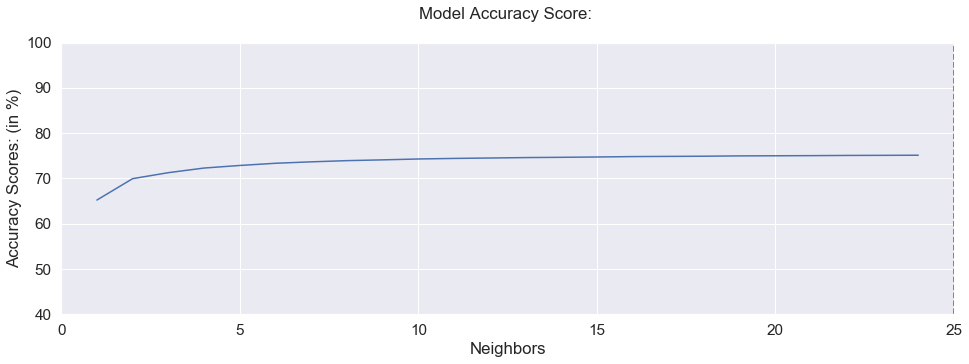

In [245]:
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
accur = []
optimum = 0
val3 = 0
for i in range(1, 25):
    k = i+1
    neighbors = knc(n_neighbors = k)
    neighbors.fit(x_train, y_train)
    y_predict = neighbors.predict(x_test)
    a = acc(y_test, y_predict)*100
    accur.append(a)
    if a > val3:
        val3 = a
        optimum = k
    print("Accuracy is ", a, "% for k value : ", k)

print("\n The optimum number of neighbors for this dataset is ", optimum)


plt.figure(figsize=(16,5))
plt.title("Model Accuracy Score: \n")
plt.ylabel("Accuracy Scores: (in %)")
plt.ylim(40, 100)
plt.xlim(0, 25)
plt.xlabel("Neighbors")
plt.plot(range(1, 25), accur)

#### Note:
Clearly, selecting a large value of k(neighnors) can lead to underfitting , similarly, selecting the small value of k can lead to overfitting. Therefore there is no such way to find a best value for k(neighbor).  

#### KNN model using the optimum number of neighbors (Calculated Above)

In [251]:
# Importing KNN Classifier 
from sklearn.neighbors import KNeighborsClassifier as knc 

knnModel = knc(25)
#Fitting the training and test set 
knnModel_1 = knnModel.fit(x_train, y_train) 
y_pred = knnModel_1.predict(x_test)

Accuracy Score for Normal KNN:  0.7511456244842744
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.03      0.06      1088
           1       0.86      0.91      0.89    182707
           2       0.58      0.18      0.28     14406
           3       0.61      0.47      0.53     65067
           4       0.64      0.75      0.69    107081
           5       0.42      0.11      0.18     15315
           6       0.51      0.21      0.29     14258
           7       0.77      0.84      0.80    178147

    accuracy                           0.75    578069
   macro avg       0.60      0.44      0.47    578069
weighted avg       0.74      0.75      0.73    578069

Confusion Matrix:
 [[    37    541      6     57    223      1     11    212]
 [    37 166651    966   1748   5489    126     55   7635]
 [     6   5568   2628    748   3175     52     32   2197]
 [     2   3416    216  30693  14599   1060    666  14415]
 [     5   7499   

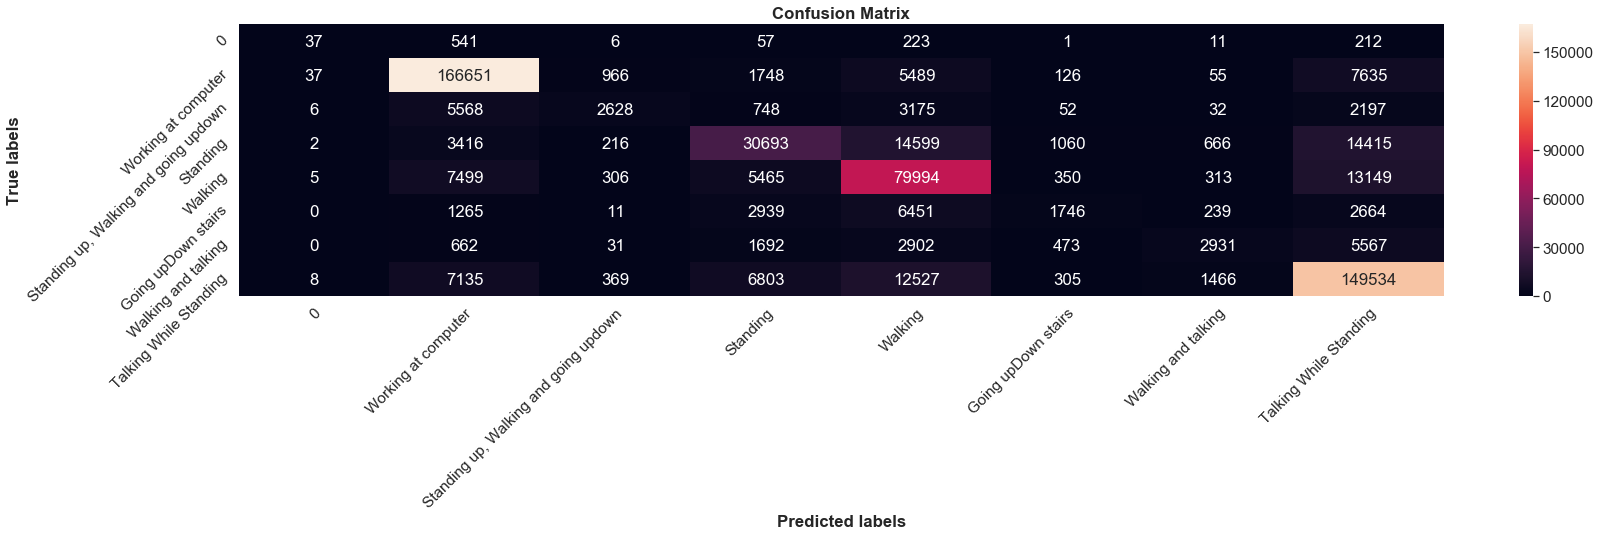

In [253]:
from sklearn.metrics import classification_report as cr
from sklearn.metrics import accuracy_score

print("Accuracy Score for Normal KNN: ", metrics.accuracy_score(y_test, y_pred))
print("Classification Report: \n", cr(y_test, y_pred))
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

#### KNN with KFold Cross Validation

In [254]:
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.neighbors import KNeighborsClassifier as knc 
from sklearn.model_selection import cross_val_predict as cvp

Knn = knc() 
k_fold = kf(n_splits = 25, random_state = 0)
#KNN is trained on the entire dataset
accuracyScores = cvs(Knn, x, y, cv = k_fold) 
#Predicting the target values using the modified KNN model on the unseen data
pred = cvp(Knn, x_test, y_test) 

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mean accuracy for the KNN Classifier(Cross Validation Score):  0.35984040107377785
Classification Report for KNN(KFold Cross Validation) :
              precision    recall  f1-score   support

           0      0.183     0.088     0.119      1088
           1      0.843     0.904     0.873    182707
           2      0.387     0.214     0.275     14406
           3      0.500     0.483     0.491     65067
           4      0.622     0.682     0.651    107081
           5      0.295     0.121     0.172     15315
           6      0.395     0.212     0.276     14258
           7      0.776     0.782     0.779    178147

    accuracy                          0.721    578069
   macro avg      0.500     0.436     0.454    578069
weighted avg      0.705     0.721     0.710    578069

Confusion Matrix:
[[    96    506      4     83    179      6     24    190]
 [   196 165178   1915   2416   5438    295    159   7110]
 [    16   5463   3077    999   2883     73     44   1851]
 [    31   4360

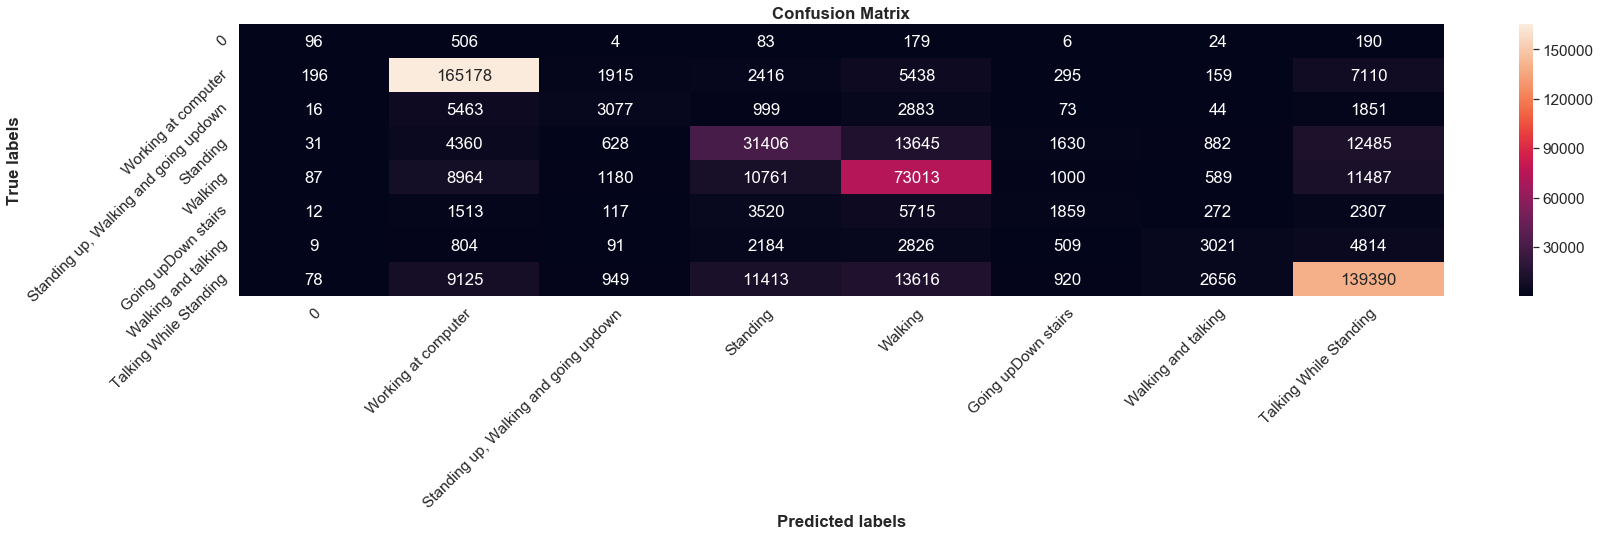

In [255]:
#Accuracy Score for tha above trained KNN classifier
print("Mean accuracy for the KNN Classifier(Cross Validation Score): ", accuracyScores.mean())
#Printing the classification report
print("Classification Report for KNN(KFold Cross Validation) :")
print(cr(y_test, pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

#### KNN With KFold Cross Validation (Shuffle)

In [258]:
SK_fold = kf(n_splits = 25, random_state = 0, shuffle = True)
accuracyScores1 = cvs(Knn, x, y, cv = SK_fold) 
Strat_pred1 = cvp(Knn, x_test, y_test)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy Score for the KNN Classifier(Cross Validation Score):  0.7225086353647145
Classification Report for KNN(Stratified shuffel Cross Validation) :
              precision    recall  f1-score   support

           0      0.183     0.088     0.119      1088
           1      0.843     0.904     0.873    182707
           2      0.387     0.214     0.275     14406
           3      0.500     0.483     0.491     65067
           4      0.622     0.682     0.651    107081
           5      0.295     0.121     0.172     15315
           6      0.395     0.212     0.276     14258
           7      0.776     0.782     0.779    178147

    accuracy                          0.721    578069
   macro avg      0.500     0.436     0.454    578069
weighted avg      0.705     0.721     0.710    578069

Confusion Matrix:
 [[    96    506      4     83    179      6     24    190]
 [   196 165178   1915   2416   5438    295    159   7110]
 [    16   5463   3077    999   2883     73     44   1851]
 

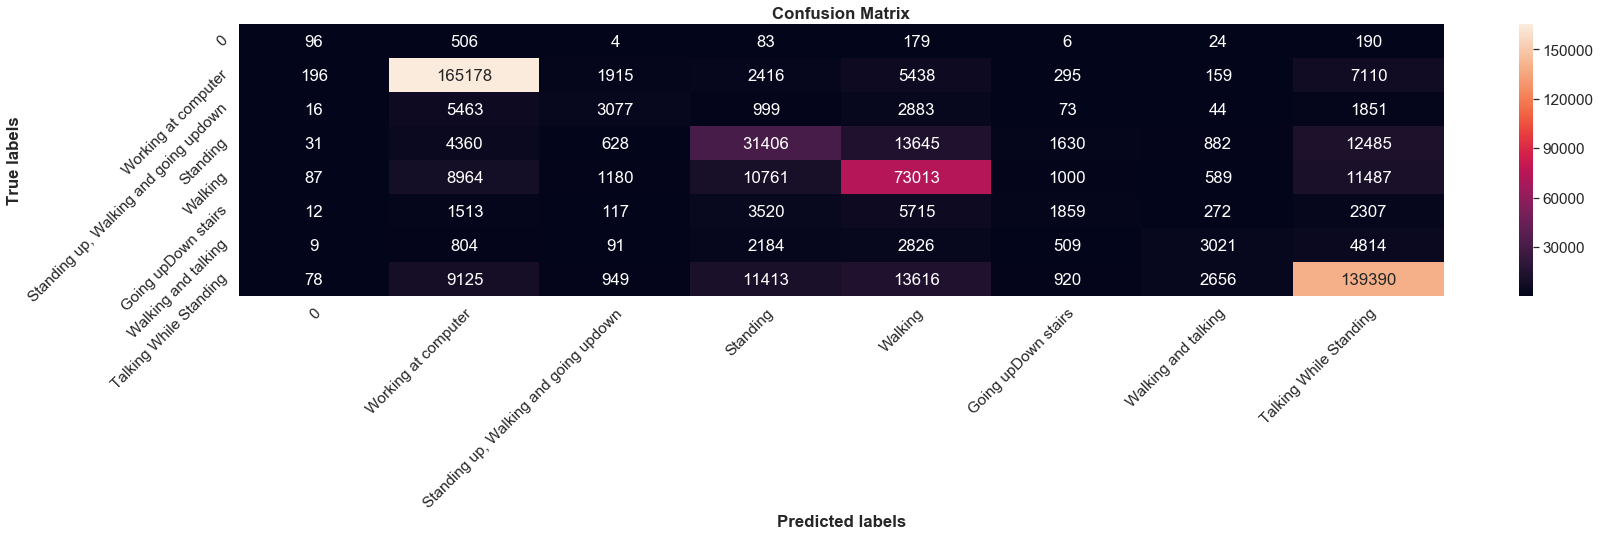

In [259]:
#Accuracy Score for tha above trained KNN classifier
print("Accuracy Score for the KNN Classifier(Cross Validation Score): ", accuracyScores1.mean())
#Printing the classification report
print("Classification Report for KNN(Stratified shuffel Cross Validation) :")
print(cr(y_test, Strat_pred, digits = 3))
#Confusion Matrix
cm = confusion_matrix(y_test, Strat_pred1)
print("Confusion Matrix:\n", cm)

# For plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt  

print("\nVisualising confusion matrix : \n")

fig = plt.figure(figsize = (27, 5))
ax= plt.subplot()
target_names = ['0', 'Working at computer', 'Standing up, Walking and going updown', 'Standing', 'Walking', 'Going upDown stairs', 'Walking and talking', 'Talking While Standing']
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels', fontweight="bold");
ax.set_ylabel('True labels', fontweight="bold"); 
ax.set_title('Confusion Matrix', fontweight="bold"); 

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

# Conclusion:

From the above classification models, it is evident that KNN (K-Nearst Neighbor) has the best accuracy overall i.e. 72%; whereas the accuracy score for the decision tree is somewhere around 65%. Therefore, for the "Activity Recognition from Single Chest-Mounted Accelerometer" dataset KNN classification model can be consdered to recognise the given activity. However, in the dataset, there were a lot of ambiguty, which had to be mitigated.

# References:

1. https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer
2. https://hbr.org/1964/07/decision-trees-for-decision-making
3. https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
4. https://machinelearningmastery.com/k-fold-cross-validation/
5. https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
6. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
7. Lecture/Tutorial Notes (Data Science With Python)
8. https://www.google.com/search?q=accelerometer+sensor+chest&tbm=isch&ved=2ahUKEwjL27r7xvTpAhUO73MBHdnbD2oQ2-cCegQIABAA&oq=accelerometer+sensor+chest&gs_lcp=CgNpbWcQAzoCCAA6BAgAEEM6BAgAEBhQrDBY9jxgnUBoAHAAeACAAfoBiAHRCJIBBTAuNC4ymAEAoAEBqgELZ3dzLXdpei1pbWc&sclient=img&ei=cWjfXovfIY7ez7sP2be_0AY&bih=943&biw=1920&rlz=1C1CHBF_enIN842IN842#imgrc=w3f_eZ5_6-lImM&imgdii=1HwbXJV6_U6mFM